# **2.2 Экспоненциальное и нормальное распределения**
---

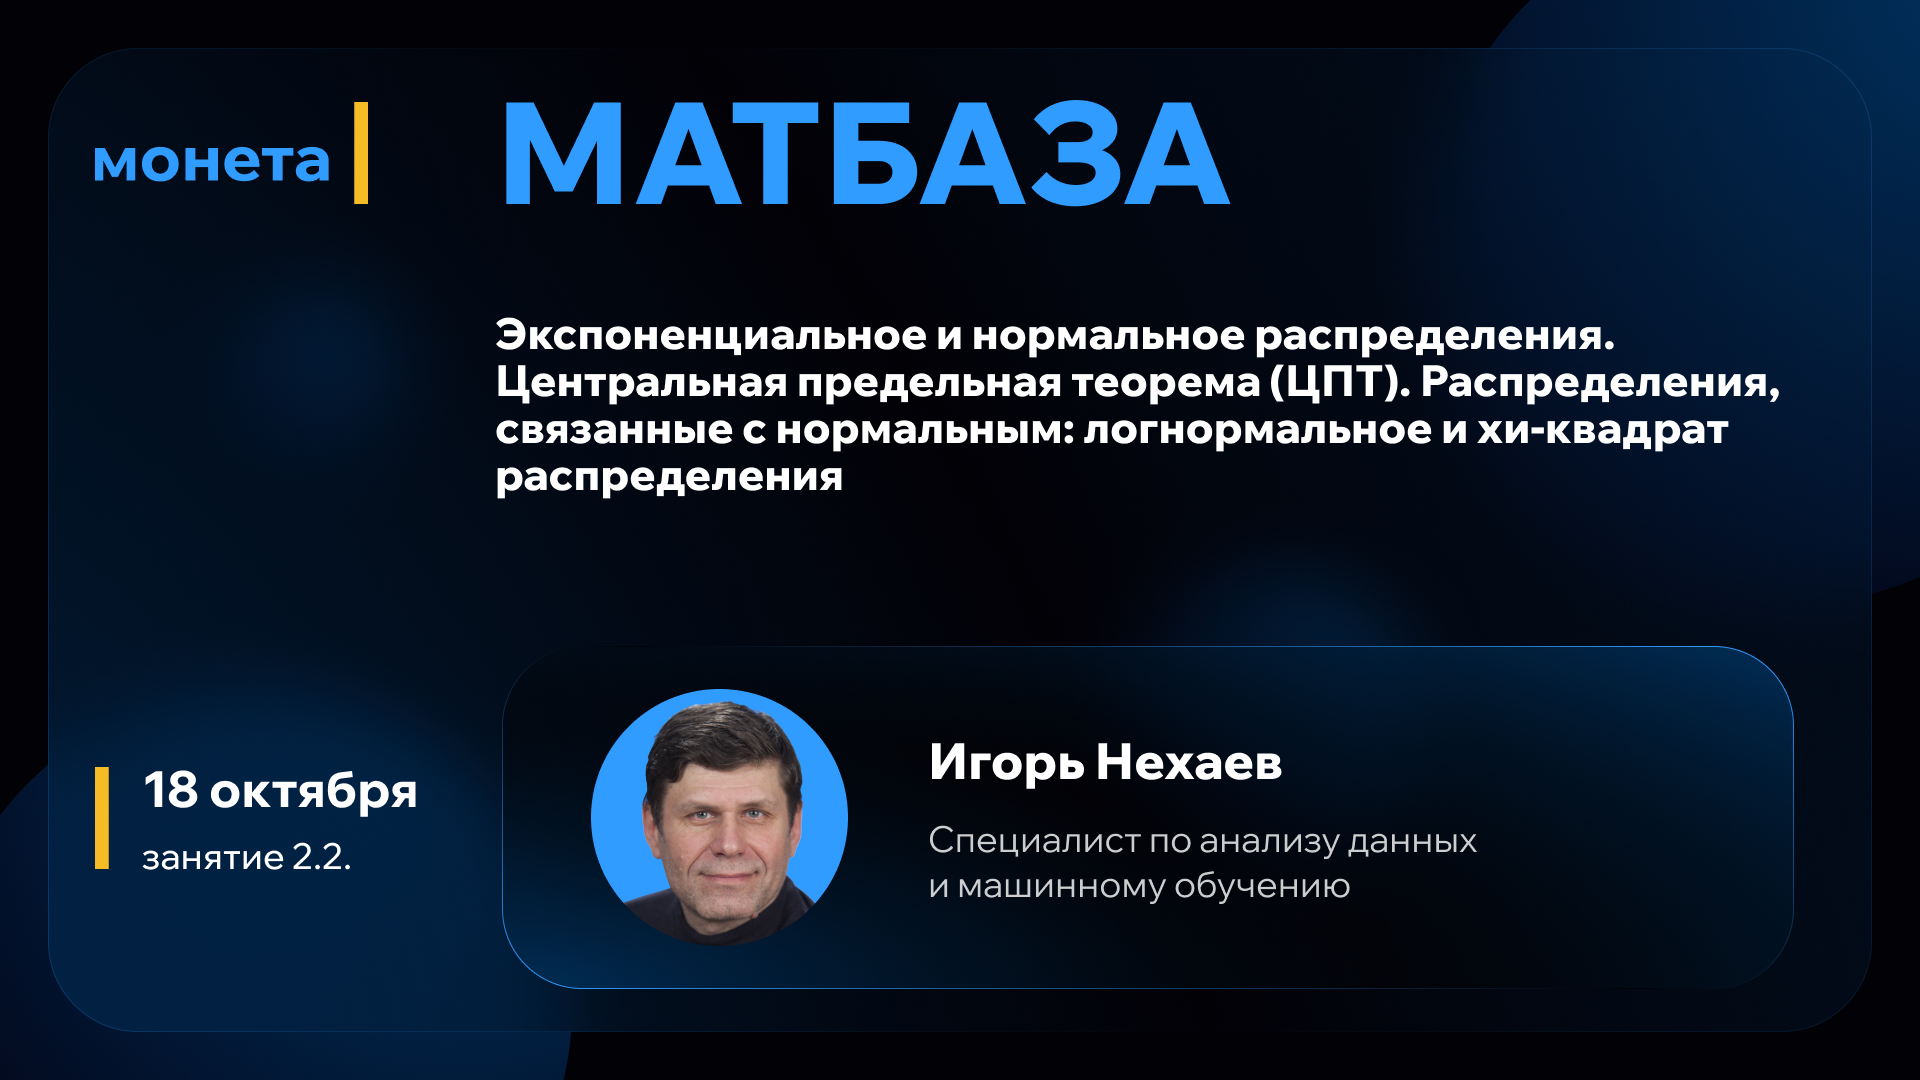

### **ПЛАН**

* Эмпирическое распределение времени наступления следующего события
* Гистограмма эмпирических распределений
* Экспоненциальное распределение
* Нормальное распределение
---
* Центральная предельная теорема
* Логнормальное распределение
* Хи-квадрат распределение


In [1]:
# импорт библиотек
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Эмпирическое распределение времени наступления следующего события
---
Вернемся к примеру с потоком обращения клиентов в службу поддержки (поток заявлений на подключение и т.п.).
> Предположим, что нам известно, что в среднем за месяц (за 30 дней) в службу поддержки поступает примерно 1800 обращений. Т.е. примерно 60 обращений в день или 2.5 обращения за час. Нам может быть интересно узнать через сколько времени поступит следующее обращение?




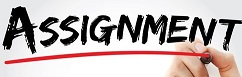

### ЗАДАНИЕ. Оценить вероятность наступления события в одном испытании Бернулли
---
Вспомним материал прошлых уроков. Будем считать. что ежеминутно мы проводим испытание Бернулли с двумя исходами: "Пришла заявка" или "Не пришла заявка". Успехом считаем событие "Пришла заявка".
Оцените вероятность успеха в одном испытании Бернулли (поступление заявки в эту минуту), если известно, что в среднем поступает 3 обращения за час.

ОТВЕТЫ:

1. 0.01
2. 0.04
3. 0.05
4. 1/3

------



> Попробуем промоделировать это распределение с использованием серии испытаний Бернулли:
 считаем, что каждую минуту событие может наступить с определенной вероятностью.

In [2]:
# смоделируем серию ежеминутных испытаний Бернулли с вероятностью успеха p за день
p = 0.04

bn = stat.bernoulli(p)
bn_series = bn.rvs(size=60 * 24)
bn_series[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [3]:
2.5 / 60, 60 / 2.5

(0.041666666666666664, 24.0)

In [4]:
# подсчитаем кол-во минут между соседними событиями
def time_intrvls(bn_series):
    last_time = 0
    intrvls = []
    for min, res in enumerate(bn_series):
        if res:
            intrvls.append(min - last_time)
            last_time = min
    return np.array(intrvls)

delta_t = time_intrvls(bn_series)
print(f"--> среднее время между событиями = {round(delta_t.mean(), 1)} c")
print(delta_t)

--> среднее время между событиями = 25.1 c
[ 11  16  22   3  37  50  25  30  33  80  28  39  11  38  30  35   4  15
   9  10  47   4   2   7  15 101  13  40  55   9  22  48  10   7  47  17
  62  23   1  14   6  30   7   4  12  18  11  44  42  19  46  12  23   8
  49   5]


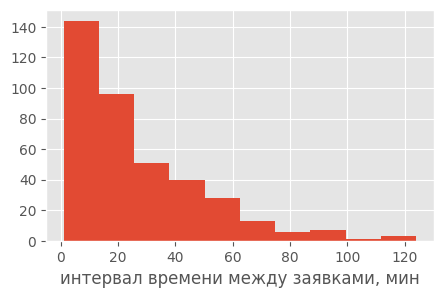

In [15]:
# нарисуем гистограмму распределения интервала времени
plt.figure(figsize=(5, 3))
plt.hist(delta_t)
plt.xlabel("интервал времени между заявками, мин");

## **Гистограмма эмпирических распределений**
---

Если мы ничего не знаем о С.В, то имеет смысл проанализировать графически ее плотность распределения и тогда выбрать - какой закон лучше всего подходит для ее описания и оценить параметры этого закона.

После подбора параметров вы получаете закон распределения, которым можно пользоваться для генерации новых значений. Но перед этим, обычно проверяют гипотезу о подчинении данной С.В. этому закону.

---
Графический анализ плотности распределения выполняют с помощью построения гистограммы распределения. Для этого:
- формируют достаточно большую выборку значений С.В.
$$(x_1, x_2,..,x_n);$$
- определяют границы $x_{min}, x_{max}$ и количество интервалов или ширину шага $h$ построения гистограммы, т.е. границы каждого фрагмента:
$$y_0 < y_1 < ... < y_k; \; y_i - y_{i-1} = h; \; i=1..k.$$
при этом должно быть выполнено: $y_0 \leq x_{min} < x_{max} \leq y_k$.

- определяют количество значений из выборки, попавших в каждый подинтервал значений:
$$n_i = \sum_{j=1}^n (x_j \in (y_{i-1}, y_i])$$

- находят относительную частоту попадания в интервал и плотность:
$$\nu_i = n_i / n,$$
$$hist_i = \nu_i / h.$$
- строят график эмпирической плотности:
$$\hat f_X(x) =
 \begin{cases}
  0,  & x \notin [y_0, y_k] \\
  hist_i, & x \in (y_{i-1}, y_i]
 \end{cases}
$$

---
Рассмотрим ее построение на примере.

--> среднее время между событиями = 25.9 мин


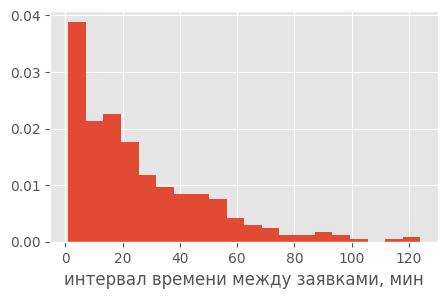

In [14]:
# то же самое, но наберем побольше выборку за неделю
bn_series = bn.rvs(size=60 * 24 * 7)

delta_t = time_intrvls(bn_series)
print(f"--> среднее время между событиями = {round(delta_t.mean(), 1)} мин")

# нарисуем гистограмму распределения интервала времени
plt.figure(figsize=(5, 3))
plt.hist(delta_t, bins=20, density=True);
plt.xlabel("интервал времени между заявками, мин");

## **Экспоненциальное распределение**
---


Если какое-то событие с равной интенсивностью может произойти в любой момент времени и известно, например, что в среднем, это событие происходит примерно раз за время $T$ (с периодичностью $T$), то С.В. X= 'время наступления события' может быть описана с помощью экспоненциального закона распределения с параметром $\lambda = 1/T$ - интенсивность события (сколько раз в единицу времени):

$$X \in Exp(\lambda)$$

Плотность экспоненциального распределения задается формулой:

$$f_{\lambda}(t) =
 \begin{cases}
   \lambda \cdot e^{-\lambda \cdot t}, & t \geq 0 \\
   0, & t < 0
 \end{cases}
$$

или

$$f_{T}(t) =
 \begin{cases}
   \frac {1}{T} \cdot e^{-t/T}, & t \geq 0 \\
   0, & t < 0
 \end{cases}
$$


Функцию экспоненциального распределения можно найти, проинтегрировав плотность:

$$F_{\lambda}(t) = \lambda \cdot \int_{0}^t e^{-\lambda \cdot \tau} d\tau = 1 - e^{-\lambda \cdot t}$$

или

$$F_{T}(t) = \frac {1}{T} \cdot \int_{0}^t e^{- \frac {\tau}{T}} d\tau = 1 - e^{- \frac {t}{T}}$$

---
Применим это распределение к примеру выше


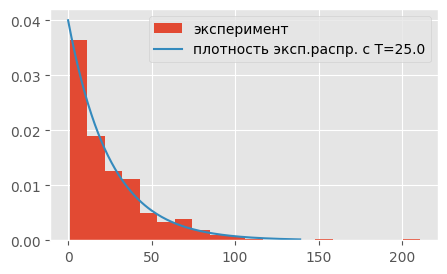

In [7]:
lamda = 0.04 # интенсивность события в минуту
Tmean = 1 / lamda  # среднее время
Tmean = round(delta_t.mean(), 1)
t = np.arange(140)
exp_val = stat.expon(scale=Tmean)

# нарисуем гистограмму распределения интервала времени
plt.figure(figsize=(5, 3))
plt.hist(delta_t, bins=20, density=True, label="эксперимент")
plt.plot(t, exp_val.pdf(t), label=f"плотность эксп.распр. с T={Tmean}")
plt.legend()
plt.show()

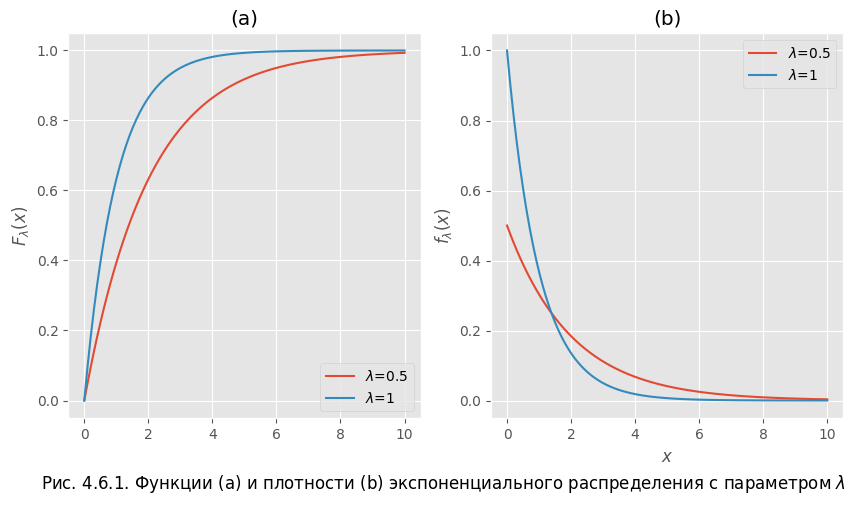

In [9]:
# зададим две разных экспоненциально распределенные случайные величины
lamda1 = 0.5
exp_rv1 = stat.expon(scale=1/lamda1)
lamda2 = 1
exp_rv2 = stat.expon(scale=1/lamda2)

# вычислим значения функции и плотности распределения
x = np.linspace(0,10,100)
cdf1 = exp_rv1.cdf(x); cdf2 = exp_rv2.cdf(x)
pdf1 = exp_rv1.pdf(x); pdf2 = exp_rv2.pdf(x)

# выведем графики функции и плотности распределения
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(x, cdf1, label = f'$\lambda$={lamda1}' )
axes[0].plot(x, cdf2, label = f'$\lambda$={lamda2}' )
axes[0].set_ylabel('$F_{\lambda}(x)$'); plt.xlabel('$x$')
axes[0].set_title('(a)')
axes[0].legend()
axes[1].plot(x, pdf1, label = f'$\lambda$={lamda1}' )
axes[1].plot(x, pdf2, label = f'$\lambda$={lamda2}' )
axes[1].set_ylabel('$f_{\lambda}(x)$'); plt.xlabel('$x$')
axes[1].set_title('(b)')
axes[1].legend()
plt.suptitle(f'Рис. 4.6.1. Функции (a) и плотности (b) экспоненциального распределения с параметром $\lambda$', y=0);

### **ПРИМЕР**
Пусть в среднем за 1 минуту слушатель совершает 2 действия на онлайн-курсе.

Вычислим вероятность того, что следующее действие слушатель совершит не раньше, чем через минуту.

---
Воспользуемся экспоненциальным распределением. Здесь параметр $\lambda = 2$ действия в минуту - интенсивность работы слушателя.

Тогда С.В. $X$ = 'время наступления события - действия пользователя' будем считать распределена по закону $Exp(\lambda = 2)$:

$$F_{\lambda=2}(t) = 1 - e^{-2 \cdot t}$$

Тогда

$$p(X > 1) = 1 - p(X < 1) = 1 - F_{\lambda=2}(1) = e^{-2 \cdot 1} \approx 0.135$$
(Это совпадает с вероятностью того, что не будет ни одного действия за 1 минуту по закону Пуассона)

---


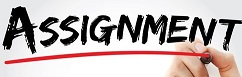

### **ЗАДАЧА**. Пусть автобусы на линии ходят в среднем с интервалом между ними в 5 минут.
Какова вероятность того, что подойдя к остановке, вам придется ждать более 3-х минут?
Воспользуйтесь экспоненциальным распределением.

---
Ответы:

1. p(X > 3) = exp(-3/5)  
2. p(X > 3) = 1 - exp(-5/3)
3. p(X > 3) = 1 - exp(-3/5)
4. p(X > 3) = exp(-3/5) / 5

## **Нормальное распределение**
---
Рассмотрим случайную величину, которая образуется в результате сложения многих других случайных величин, имеющих самое разное распределение, но при этом их значения не слишком отклоняются сильно от значений других С.В.

- Например, пусть С.В. $X$ - это рост или вес человека. Что влияет на рост/вес человека? Наследственность, питание, его спортивные увлечения, его образ жизни, климат, ... Т.е. достаточно много составляющих, много факторов и все они, складываясь, определяют его рост.

- Другой пример - количество купленного товара в магазине в конкретный день. Можно считать, что каждый зашедший потенциальный покупатель в магазин - это испытание Бернулли с некоторой вероятностью успеха p (купит товар). Но, во первых, мы не знаем сколько человек в этот день зайдет в магазин, во вторых, какова покупательная способность этих людей. А она зависит от многих факторов, в том числе и сколько у него времени на принятие решения, есть ли у него конкретные намерения, как на него влияет спутница, ...

Да, и кстати, биномиальное распределение при большом $n$ ($\to \infty$), но постоянном $p$ хорошо описывается нормальным распределением (иногда с помощью функций, описывающих непрерывные распределения проще найти вероятности попадания в интервал для ДСВ).

---
Рассмотрим функцию и плотность нормального распределения. Сначала сгенерируем пример, который приводит к образованию нормального распределения.

ПРИМЕР. Покупка кофемашины
---
Рассмотрим пример покупки кофемашины (в онлайн-магазине, когда менеджеры не околдовывают вас красноречием). Социологические исследования в США в 50-х годах 20-го столетия показали, что вероятность купить товар тем выше, чем больше разница между приготовленной Вами суммой S и стоимостью товара C и может быть описана формулой:

$$p(покупки) \approx \frac {e^X}{1 + e^X}, \; X = S - C$$

Если $S=C$, то $X=0$ и $p=0.5$ (см. график логистической функции)

Эта функция $p(X)$ даже получила название логистической функции

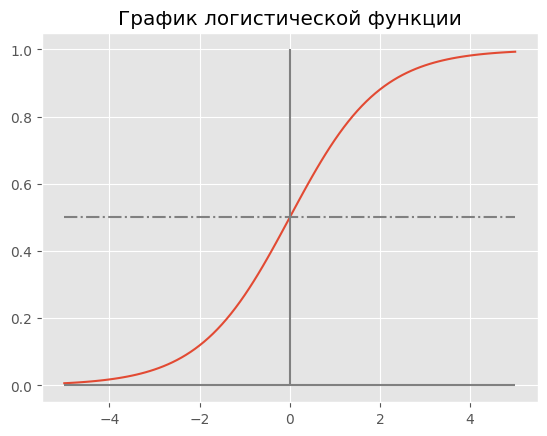

In [22]:
log_fun = lambda x: 1.0 / (1 + np.exp(-x))
x = np.arange(-5, 5.1, 0.1)
plt.plot(x, log_fun(x))
plt.hlines(y=0, xmin=-5, xmax=5, color='gray')
plt.vlines(x=0, ymin=0, ymax=1, color='gray')
plt.hlines(y=0.5, xmin=-5, xmax=5, color='gray', linestyles='-.')
plt.title("График логистической функции");

смоделируем ситуацию, когда за кофемашиной приходят покупатели с разной платежной готовностью купить кофемашину (с разным S - C) и построим СВ Y = кол-во купленных кофемашин и будем моделировать купил или не купил.

In [39]:
N = 100 # кол-во покупателей за день
X = np.random.randn(N)
pX = log_fun(X)
uni_val = stat.uniform()

rX = uni_val.rvs(N)
cost = 10 + 50 * uni_val.rvs(N)
Y = round(sum((rX < pX) * cost), 2)
Y

1998.97

средняя сумма = 1778.25 т.р.


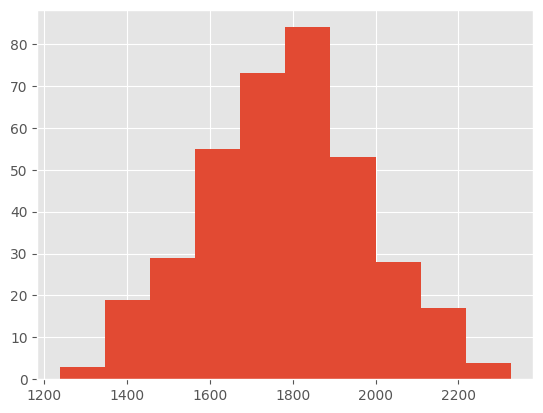

In [44]:
def one_day_sum(N):
    X = np.random.randn(N)
    pX = log_fun(X)
    uni_val = stat.uniform()
    rX = uni_val.rvs(N)
    cost = 10 + 50 * uni_val.rvs(N)
    Y = round(sum((rX < pX) * cost), 2)
    return Y

n_exp = 365  # кол-во экспериментов

y_series = [one_day_sum(N) for _ in range(n_exp)]
print(f"средняя сумма = {round(np.mean(y_series), 2)} т.р.")
plt.hist(y_series);

### **Плотность нормального распределения**
---

Для заданных параметров нормального распределения $m_X, \sigma_X$, его плотность задается следующей формулой:

$$\varphi_X(x, m_X, \sigma_X) = \frac {1}{\sqrt {2\pi} \cdot \sigma_X} exp(-\frac{(x-m_X)^2}{2\sigma^2_X})$$

Если С.В. $X$ подчиняется **нормальному распределению** с параметрами $m, \sigma$, то это обозначается так:

$$X \in N(m, \sigma)$$

---
Под **стандартным нормальным распределением** понимается нормальное распределение с параметрами $m=0, \sigma = 1$.

---
Проиллюстрируем нормальное распределение примерами.

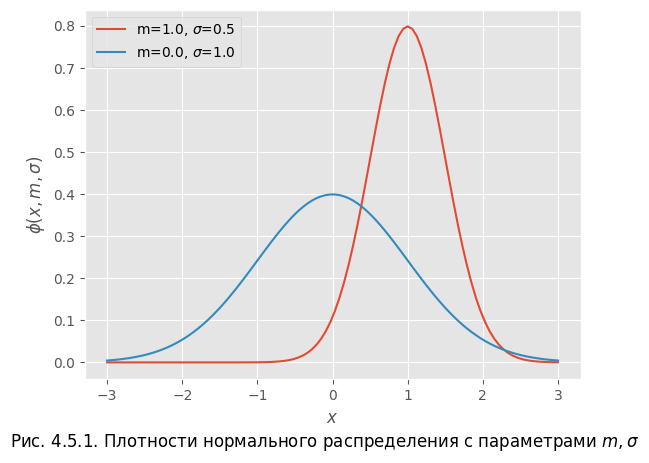

In [16]:
x = np.linspace(-3,3,100)

# зададим нормально распределенную случайную величину
mu1 = 1.0; sigma1 = 0.5
norm_rv1 = stat.norm(loc=mu1, scale=sigma1)
mu2 = 0.0; sigma2 = 1.0
norm_rv2 = stat.norm(loc=mu2, scale=sigma2)

# вычислим значения функции плотности вероятности нормального распределения
pdf1 = norm_rv1.pdf(x); pdf2 = norm_rv2.pdf(x)
plt.plot(x, pdf1, label = f'm={mu1}, $\sigma$={sigma1}' )
plt.plot(x, pdf2, label = f'm={mu2}, $\sigma$={sigma2}' )
plt.ylabel('$\phi(x, m, \sigma)$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. 4.5.1. Плотности нормального распределения с параметрами $m, \sigma$', y=0);

вернемся к нашему примеру и попробуем описать полученную гистограмму нормальным законом

In [50]:
# зададим нормально распределенную случайную величину
mu = round(np.mean(y_series), 1); sigma = round(np.sqrt(np.var(y_series)), 2)
norm_rv = stat.norm(loc=mu, scale=sigma)
# сгенерируем 100 значений
xvals = norm_rv.rvs(size=100)
# вычислим значения функции плотности вероятности нормального распределения
x = np.linspace(xvals.min(), xvals.max(), 100)
pdf = norm_rv.pdf(x)

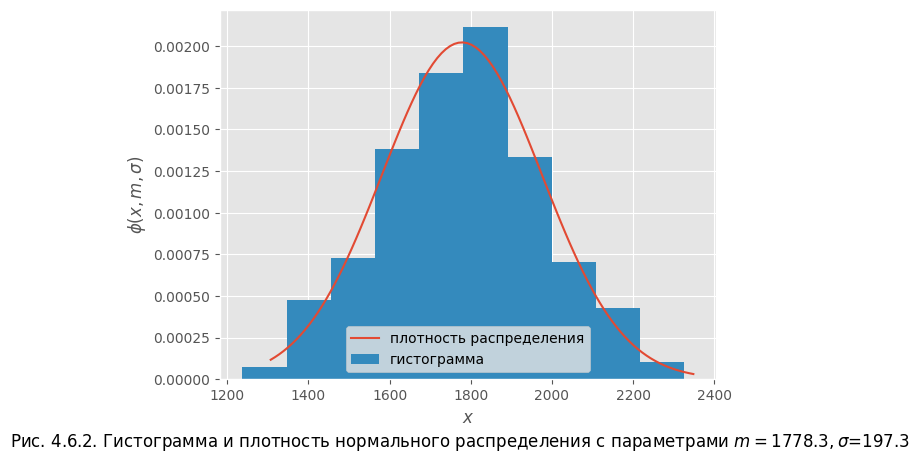

In [51]:
# сравним графики гистограммы и плотности распределения
plt.plot(x, pdf, label = 'плотность распределения' )
plt.hist(y_series, density=True, label='гистограмма')
plt.ylabel('$\phi(x, m, \sigma)$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. 4.6.2. Гистограмма и плотность нормального распределения с параметрами $m={mu}, \sigma$={sigma}', y=0);

### **Функция нормального распределения**
---
Для функции нормального распределения нет формулы, она считается с помощью интеграла плотности:

$$\Phi(x, m_X, \sigma_X) = \int_{-\infty}^{x} \varphi(x, m_X, \sigma_X) dx = \frac {1}{\sqrt {2\pi} \cdot \sigma_X} \int_{-\infty}^{x} exp(-\frac{(x-m_X)^2}{2\sigma^2_X})dx$$

Для стандартного нормального распределения эта функция рассчитывается численно или задается таблично:

$$\Phi(x) = \int_{-\infty}^{x} \varphi(x) dx = \frac {1}{\sqrt {2\pi}} \int_{-\infty}^{x} exp(-\frac{x^2}{2})dx$$

Для расчета интеграла в общем случае, используется преобразование переменных:

$$x' = \frac {x-m_X}{\sigma_X},$$

$$\Phi(x, m_X, \sigma_X) = \frac {1}{\sqrt {2\pi} \cdot \sigma_X} \int_{-\infty}^{x} exp(-\frac{(x-m_X)^2}{2\sigma^2_X})dx = \frac {1}{\sqrt {2\pi}} \int_{-\infty}^{x} exp(-\frac{(x-m_X)^2}{2\sigma^2_X})d(\frac {x-m_X}{\sigma_X}) = \frac {1}{\sqrt {2\pi}} \int_{-\infty}^{\frac {x-m_X}{\sigma_X}} exp(-\frac{x'^2}{2})dx' = \Phi (\frac {x-m_X}{\sigma_X})$$


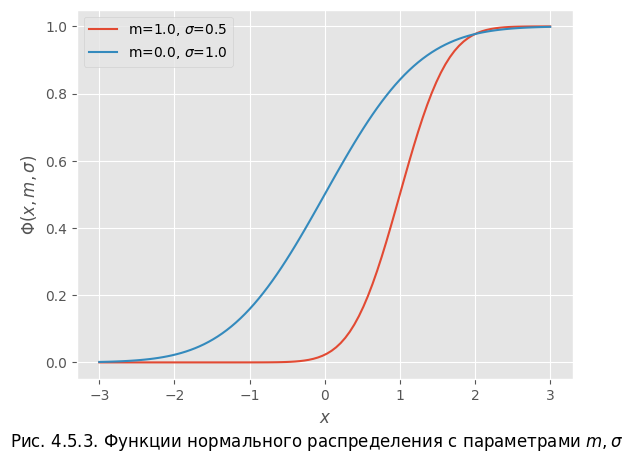

In [52]:
# зададим нормально распределенные случайные величины
mu1 = 1.0; sigma1 = 0.5
norm_rv1 = stat.norm(loc=mu1, scale=sigma1)
mu2 = 0.0; sigma2 = 1.0
norm_rv2 = stat.norm(loc=mu2, scale=sigma2)

# вычислим значения функции нормального распределения
x = np.linspace(-3,3,100)
cdf1 = norm_rv1.cdf(x); cdf2 = norm_rv2.cdf(x)
# выведем графики функции нормального распределения
plt.plot(x, cdf1, label = f'm={mu1}, $\sigma$={sigma1}' )
plt.plot(x, cdf2, label = f'm={mu2}, $\sigma$={sigma2}' )
plt.ylabel('$\Phi(x, m, \sigma)$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. 4.5.3. Функции нормального распределения с параметрами $m, \sigma$', y=0);

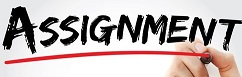

### **ЗАДАЧА**. Пусть при росте в 1м75см средний вес человека составляет 75 кг, а СКО = 5 кг.
Какова вероятность того, что вес произвольно взятого человека с ростом 1м75см превысит 80 кг?
Считаем, что вес при фиксированном росте подчиняется нормальному закону.

Воспользуйтесь графиком функцией стандартного нормального распределения при m=0 и sigma=1.

ОТВЕТЫ:

1. 0.1
2. 0.15
3. 0.2
4. 0.85


---
---

### **Резюме**

- Если С.В. $X$ = "время до следующего события" во временной последовательности событий с известной средней интенсивностью их происхождения $\lambda = 1/T$ (и одинаковой вероятностью его наступления в любой момент времени - см. закон Пуассона), то она хорошо описывается экспоненциальным распределением с параметром $\lambda$:
$$X \in Exp(\lambda)$$

- Чтобы идентифицировать С.В. $X$, т.е. описать вероятностное распределение, которому подчиняется С.В. $X$, мы должны сначала подобрать подходящий вид закона распределения, а затем оценить его параметры; после этого проверить правильность нашей гипотезы - что данные наблюдений не противоречат ей;

- вид закона распределения Н.С.В. можно проанализировать, построив гистограмму распределения на основе имеющейся выборки.


Дополнительные материалы по работе с с вероятностными распределениями см:

- библиотеку numpy.random здесь: https://numpy.org/doc/stable/reference/random/index.html;
- библиотеку SciPy.stats можно найти здесь: https://docs.scipy.org/doc/scipy/tutorial/stats.html